In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.0.1
3.1


In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time


In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(2)

In [5]:
def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 0",
        **dict(
            get_do_nothing_dict(),
            **{}
        )
    ),
]

In [6]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
100%|████████████████████████████████████████| 100/100 [00:09<00:00, 10.41it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [16]:
experiments, outcomes = results

In [17]:
policies = experiments['policy']
data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

In [18]:
data

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy
0,2.069168e+09,0,0.0,0.0,3.278688,policy 0
1,3.720181e+09,0,0.0,0.0,4.722712,policy 0
2,1.597792e+09,0,0.0,0.0,2.876992,policy 0
3,3.527796e+08,0,0.0,0.0,0.250925,policy 0
4,1.235604e+08,0,0.0,0.0,0.206568,policy 0
...,...,...,...,...,...,...
95,2.474223e+09,0,0.0,0.0,1.725024,policy 0
96,3.044571e+09,0,0.0,0.0,1.821735,policy 0
97,2.508076e+09,0,0.0,0.0,1.714676,policy 0
98,2.413342e+09,0,0.0,0.0,2.556504,policy 0


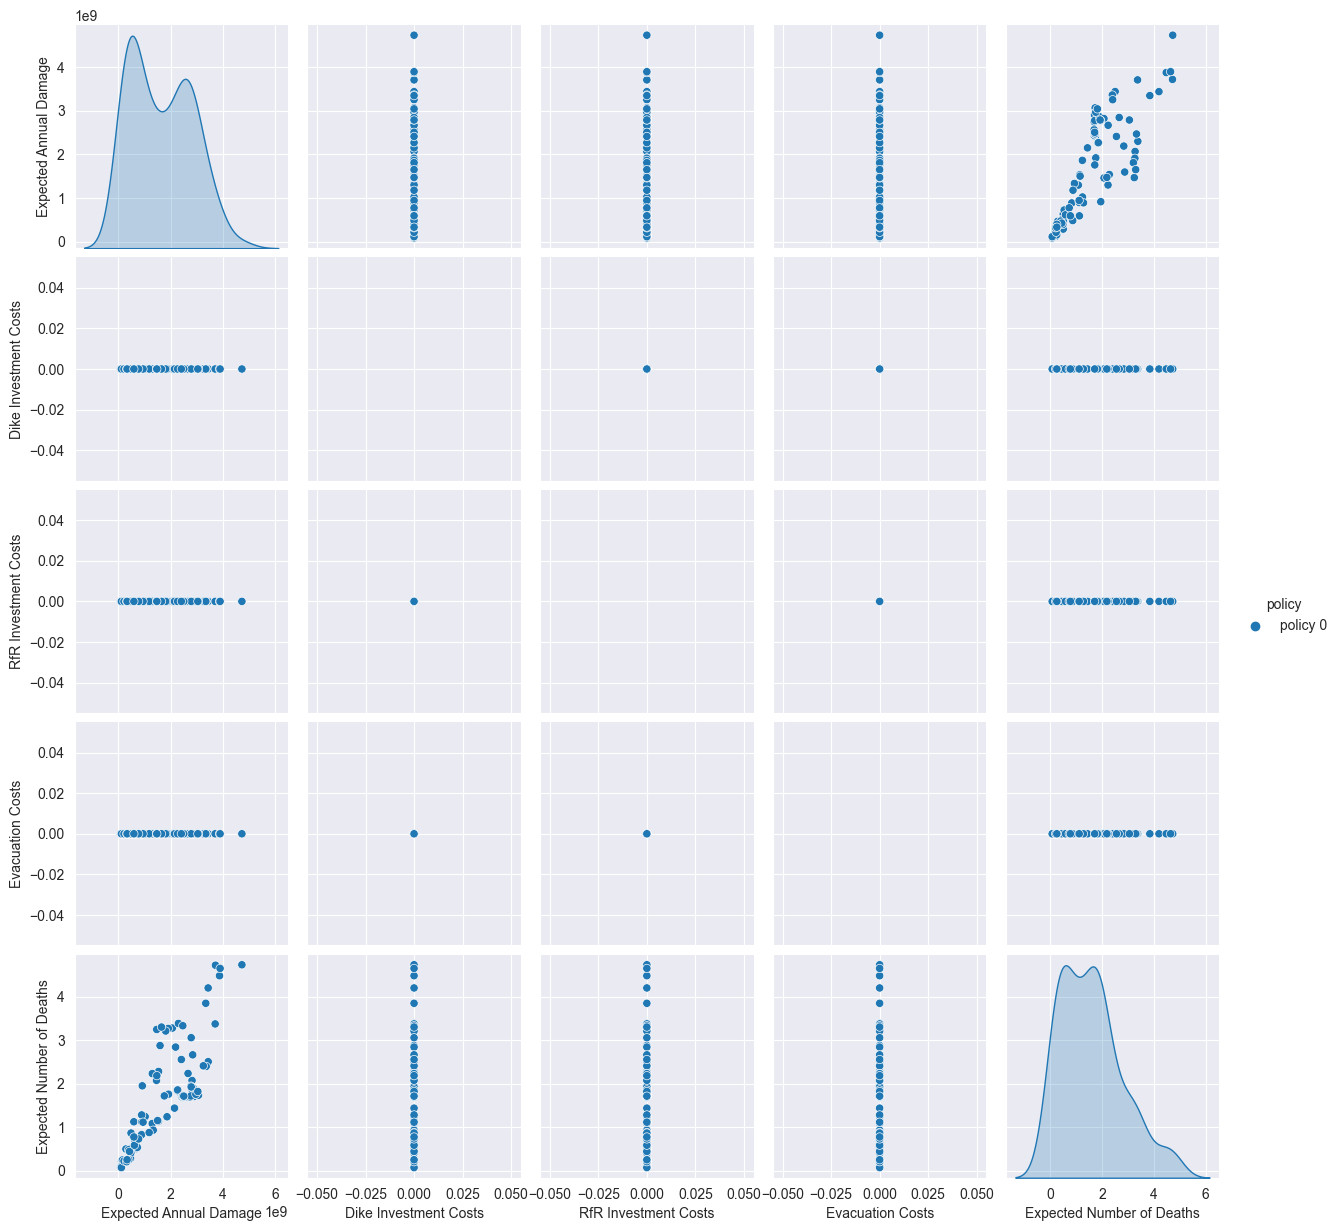

In [19]:
sns.pairplot(data, hue='policy', )
plt.show()